In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

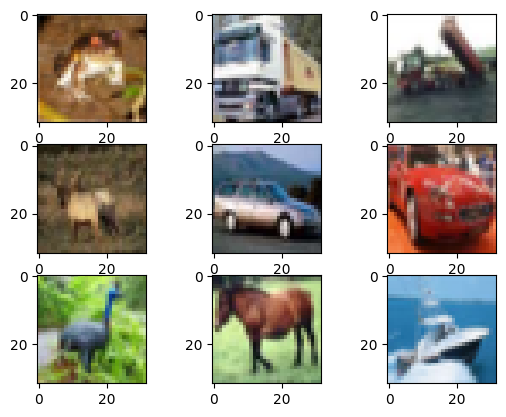

In [5]:
# Display some images from the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
def create_cnn_model():
    model = Sequential()
    
    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the feature maps into a 1D vector
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization

    # Output Layer
    model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

    return model


In [8]:
# Create the model
model = create_cnn_model()

In [9]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [10]:
# compile model 

In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [13]:
# train model 


history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 38s 60ms/step - loss: 1.1157 - accuracy: 0.6115 - val_loss: 1.0288 - val_accuracy: 0.6402
Epoch 2/10
625/625 [==============================] - 47s 75ms/step - loss: 1.0212 - accuracy: 0.6449 - val_loss: 0.9596 - val_accuracy: 0.6636
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.9521 - accuracy: 0.6658 - val_loss: 0.9844 - val_accuracy: 0.6600
Epoch 4/10
625/625 [==============================] - 56s 90ms/step - loss: 0.8974 - accuracy: 0.6867 - val_loss: 0.9332 - val_accuracy: 0.6728
Epoch 5/10
625/625 [==============================] - 58s 93ms/step - loss: 0.8468 - accuracy: 0.7023 - val_loss: 0.8985 - val_accuracy: 0.6923
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.7991 - accuracy: 0.7198 - val_loss: 0.8895 - val_accuracy: 0.6904
Epoch 7/10
625/625 [==============================] - 32s 52ms/step - loss: 0.7669 - accuracy: 0.7332 - val_loss: 0.8493 - val_accuracy:

In [14]:
# evaluate the model 

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 [==============================] - 6s 19ms/step - loss: 0.9053 - accuracy: 0.7035
Test Accuracy: 0.7035


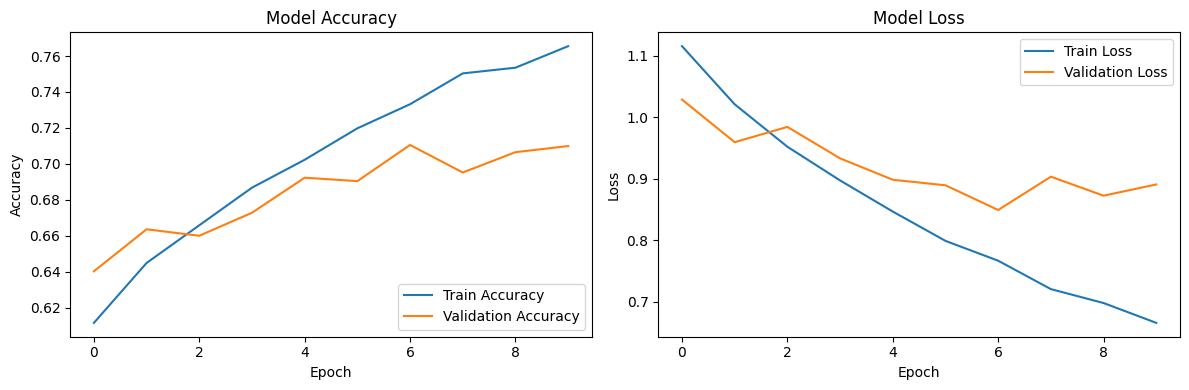

In [15]:
# visualise the training process

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 1s/step


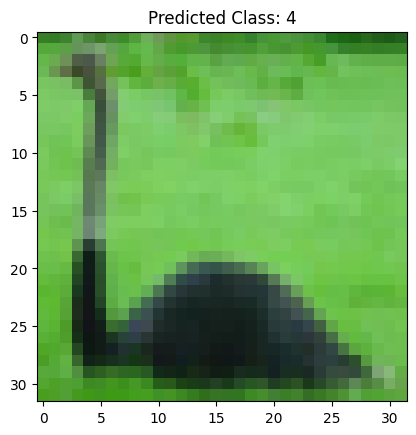

In [16]:
# Make predictions

import numpy as np

# Select a random image from the test set
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]

# Predict the class of the image
prediction = model.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(prediction)

# Display the image and prediction
plt.imshow(random_image)
plt.title(f"Predicted Class: {predicted_class}")
plt.show()
